# **Introduction to the Teaching Rating Dataset**

This dataset provides an in-depth look at teaching evaluations, capturing a variety of instructor and course characteristics that may influence student ratings. It includes several key features:

**Instructor Attributes:** minority status, age, gender, beauty score, tenure status, native English speaker status.
**Couse Characteristics:** division (lower or upper), number of credits, single-credit status.
**Evaluation Metrics:** student evaluation scores, number of students in the class (both actual and total possible enrollment.
By analyzing these features, we can explore potential factors that influence teaching ratings, identify patterns, and understand the impact of instructor demographics and course structure on evaluations. This dataset serves as a valuable resource for examining bias, effectiveness, and student perceptions in academic settings.

# **Loading and Overview of the Teaching Ratings Dataset**

In [43]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
#Defining the variable and loading the datasets
teaching = pd.read_csv('teachingratings.csv')
display(teaching)

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
1,yes,36,female,more,0.289916,3.7,upper,yes,yes,86,125,1,0,1,1,0,1,1,1
2,yes,36,female,more,0.289916,3.6,upper,yes,yes,76,125,1,0,1,1,0,1,1,1
3,yes,36,female,more,0.289916,4.4,upper,yes,yes,77,123,1,1,1,1,0,1,1,1
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,no,37,male,more,0.933396,3.5,upper,yes,yes,15,17,40,1,0,0,0,1,1,1
459,no,58,female,more,0.111563,3.5,upper,yes,yes,26,34,47,1,0,1,0,1,1,1
460,no,42,male,more,-0.900580,4.0,upper,yes,yes,45,86,61,1,0,0,0,1,1,1
461,no,39,male,more,0.643014,4.3,upper,yes,yes,22,29,62,1,0,0,0,1,1,1


In [44]:
#check for duplicated
teaching.duplicated().sum()

1

In [45]:
#drop duplicated for row 
teaching.drop_duplicates(inplace=True)


In [46]:
#rechecking for duplicated column
teaching.duplicated().sum()

0

In [47]:
#to check missing value
teaching.isnull().sum()

minority           0
age                0
gender             0
credits            0
beauty             0
eval               0
division           0
native             0
tenure             0
students           0
allstudents        0
prof               0
PrimaryLast        0
vismin             0
female             0
single_credit      0
upper_division     0
English_speaker    0
tenured_prof       0
dtype: int64

In [48]:
#checking for data types
teaching.dtypes

minority            object
age                  int64
gender              object
credits             object
beauty             float64
eval               float64
division            object
native              object
tenure              object
students             int64
allstudents          int64
prof                 int64
PrimaryLast          int64
vismin               int64
female               int64
single_credit        int64
upper_division       int64
English_speaker      int64
tenured_prof         int64
dtype: object

In [49]:
teaching.describe()

,age,beauty,eval,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,48.331169,0.000241,3.997403,36.670996,55.244589,45.480519,0.203463,0.138528,0.422078,0.058442,0.660173,0.939394,0.779221
std,9.786255,0.789486,0.555151,45.056003,75.140120,27.520583,0.403011,0.345828,0.494426,0.234831,0.474164,0.238865,0.415222
min,29.000000,-1.450494,2.100000,5.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,-0.656269,3.600000,15.000000,19.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,48.000000,-0.068014,4.000000,23.000000,29.000000,44.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,57.000000,0.547945,4.400000,40.000000,60.000000,70.750000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,73.000000,1.970023,5.000000,380.000000,581.000000,94.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
#checking for unique value for prof column 
teaching['prof'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55,
       56, 57, 58, 59, 60, 63, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 75,
       76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92,
       93, 94, 22, 30, 40, 47, 61, 62, 69])

In [51]:
#checking for unique value for prof column in numeric
teaching['prof'].nunique()

94

In [52]:
#dropping duplicates in the prof column 
no_duplicate_teaching=teaching.drop_duplicates(subset=['prof'])

In [53]:
no_duplicate_teaching.head()

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1
7,no,51,male,more,-0.571984,3.7,upper,yes,yes,55,55,3,0,0,0,0,1,1,1
9,no,40,female,more,-0.677963,4.3,upper,yes,yes,40,46,4,0,0,1,0,1,1,1
17,no,31,female,more,1.509794,4.4,upper,yes,yes,42,48,5,0,0,1,0,1,1,1


In [54]:
no_duplicate_teaching.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94 entries, 0 to 462
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   minority         94 non-null     object 
 1   age              94 non-null     int64  
 2   gender           94 non-null     object 
 3   credits          94 non-null     object 
 4   beauty           94 non-null     float64
 5   eval             94 non-null     float64
 6   division         94 non-null     object 
 7   native           94 non-null     object 
 8   tenure           94 non-null     object 
 9   students         94 non-null     int64  
 10  allstudents      94 non-null     int64  
 11  prof             94 non-null     int64  
 12  PrimaryLast      94 non-null     int64  
 13  vismin           94 non-null     int64  
 14  female           94 non-null     int64  
 15  single_credit    94 non-null     int64  
 16  upper_division   94 non-null     int64  
 17  English_speaker  94 no

In [55]:
no_duplicate_teaching.shape

(94, 19)

In [56]:
no_duplicate_teaching.describe()

,age,beauty,eval,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.00000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,47.553191,0.088349,3.920213,36.436170,56.223404,47.500000,0.074468,0.12766,0.425532,0.021277,0.680851,0.925532,0.840426
std,10.256513,0.827506,0.527233,41.765232,73.429237,27.279418,0.263939,0.33550,0.497074,0.145079,0.468646,0.263939,0.368175
min,29.000000,-1.450494,2.200000,7.000000,11.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,-0.580686,3.525000,16.250000,21.000000,24.250000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,47.000000,-0.039794,4.000000,24.500000,34.000000,47.500000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,56.000000,0.704112,4.300000,44.750000,64.250000,70.750000,0.000000,0.00000,1.000000,0.000000,1.000000,1.000000,1.000000
max,73.000000,1.970023,4.900000,348.000000,574.000000,94.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
#check for mean in age column 
no_duplicate_teaching['age'].mean()

47.5531914893617

In [58]:
#check for std in age column 
no_duplicate_teaching['age'].std()

10.25651329515495

In [62]:
#to groupby and know the division by eval coulmmn 
division_evaluation=teaching.groupby('division').sum()['eval'].reset_index()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<function matplotlib.pyplot.show(close=None, block=None)>

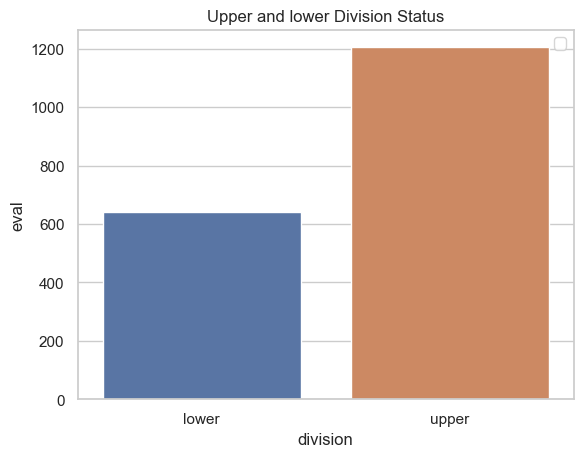

In [68]:
#bar chart for knowing the lower and upper division  for the data set 
sns.set(style='whitegrid')
ax=sns.barplot(x='division', y='eval',data=division_evaluation)
plt.title('Upper and lower Division Status')
plt.legend()
plt.show

In [70]:
#to groupby and know the division by eval coulmmn 
mean_evaluation=teaching.groupby('division')['eval'].mean().reset_index()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<function matplotlib.pyplot.show(close=None, block=None)>

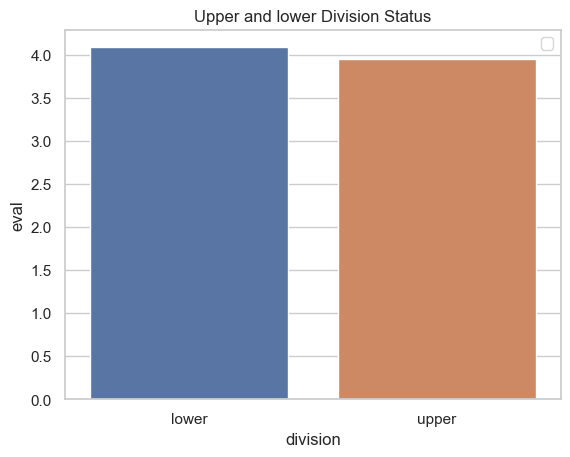

In [71]:
#bar chart for knowing the lower and upper division  for the data set 
sns.set(style='whitegrid')
ax=sns.barplot(x='division', y='eval',data=mean_evaluation)
plt.title('Upper and lower Division Status')
plt.legend()
plt.show

# **Relationship Between Instructor Age and Evaluation Scores**

<Axes: xlabel='age', ylabel='eval'>

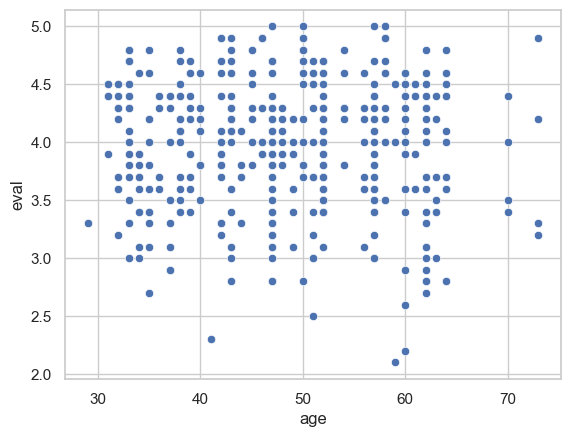

In [72]:
#checking the relationship btw age and eval
sns.scatterplot(x='age', y='eval',data=teaching)

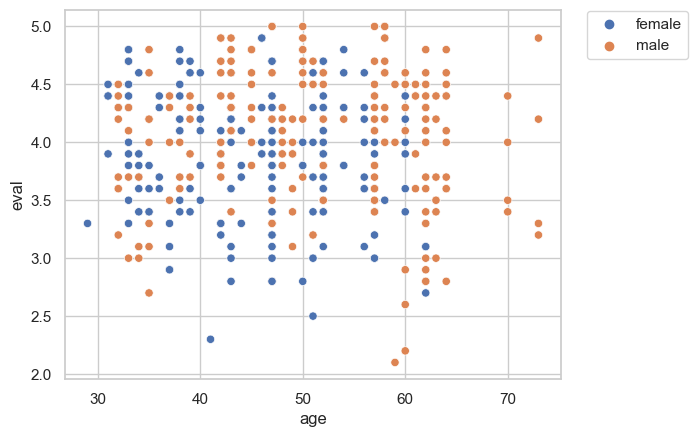

In [78]:
#checking the relationship btw age and eval and using gender as legend 
sns.scatterplot(x='age', y='eval',data=teaching,hue='gender')
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.1)

# **Distribution of Course Credits by Instructor Beauty Score**

<Axes: xlabel='beauty', ylabel='credits'>

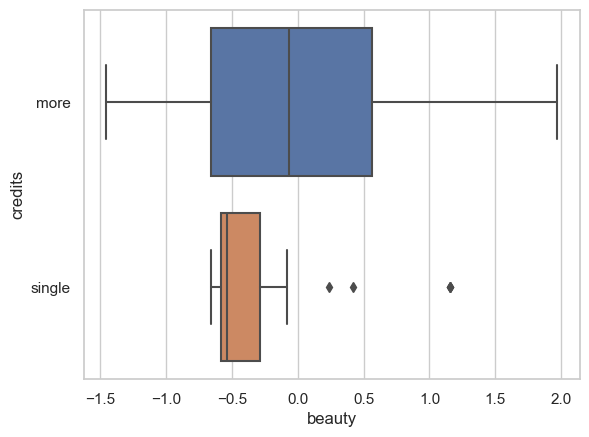

In [80]:
#plotting boxplot to know the relationship btw beauty and credits
sns.boxplot(x='beauty', y='credits',data=teaching

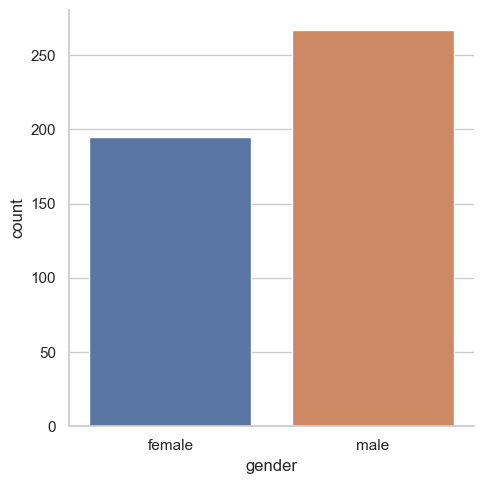

In [81]:
#plotting catplot to show the course thought by each gender  
sns.catplot(x='gender', kind='count', data=teaching)

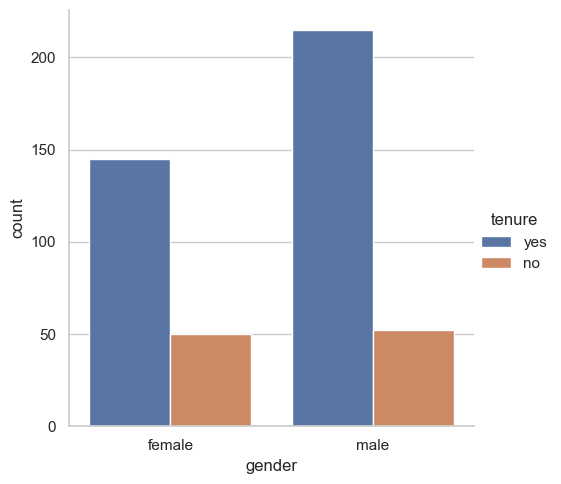

In [82]:
#plotting histplot to show the course thought by each gender and tenure
sns.catplot(x='gender', kind='count', data=teaching, hue='tenure')

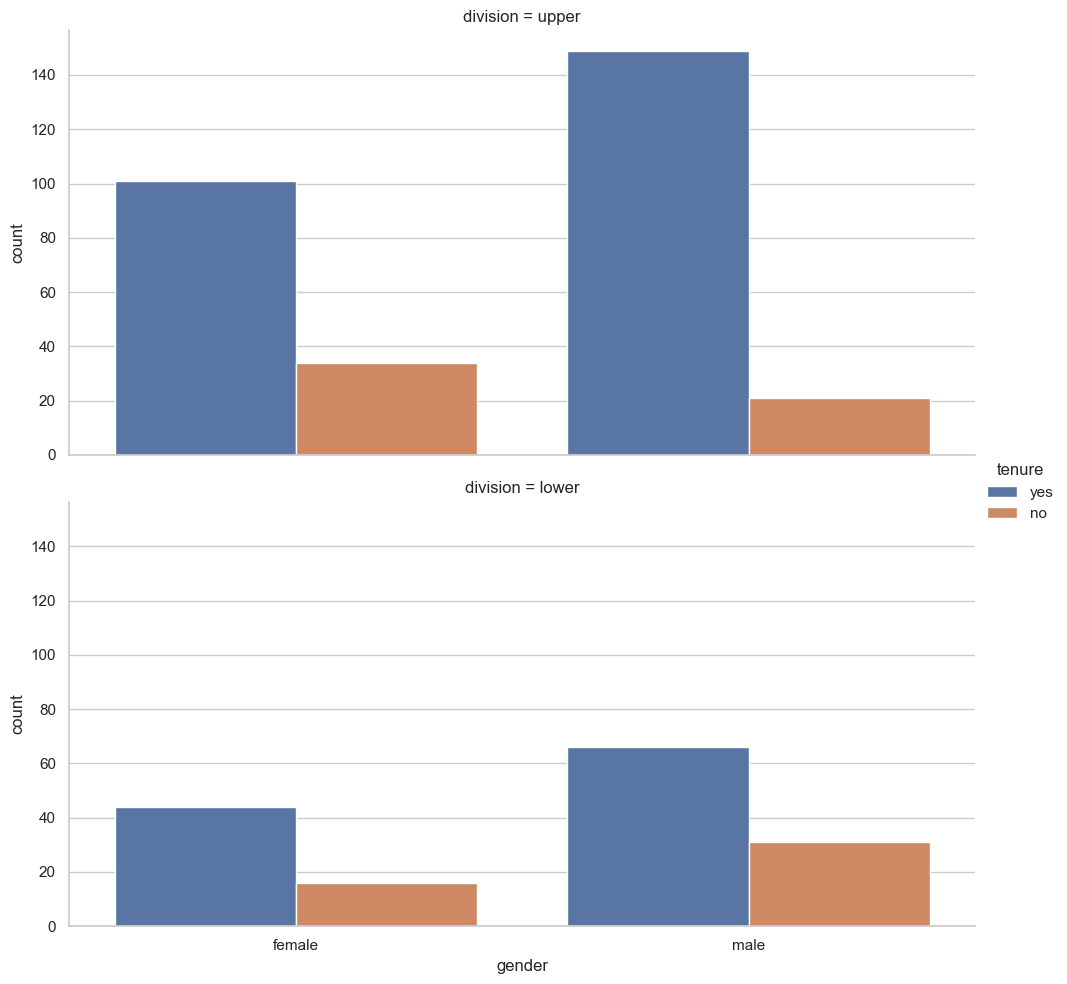

In [84]:
#plotting two differnt plot using same code, to diffreciate the tenure via division 
sns.catplot(x='gender', kind='count', data=teaching, hue='tenure',row='division', height=5, aspect=2)

<Axes: xlabel='age', ylabel='minority'>

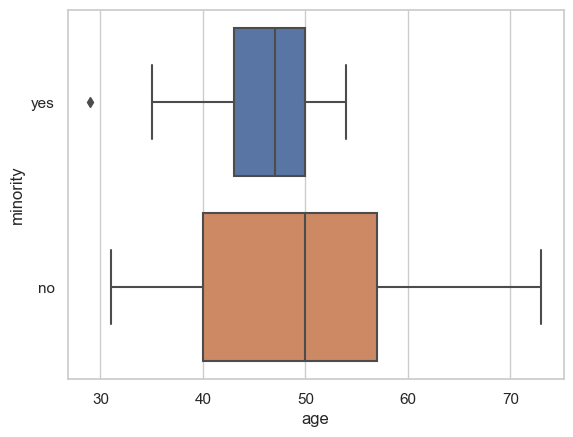

In [85]:
#plotting boxplot to know the relationship btw age of the prof  and minority
sns.boxplot(x='age', y='minority',data=teaching)

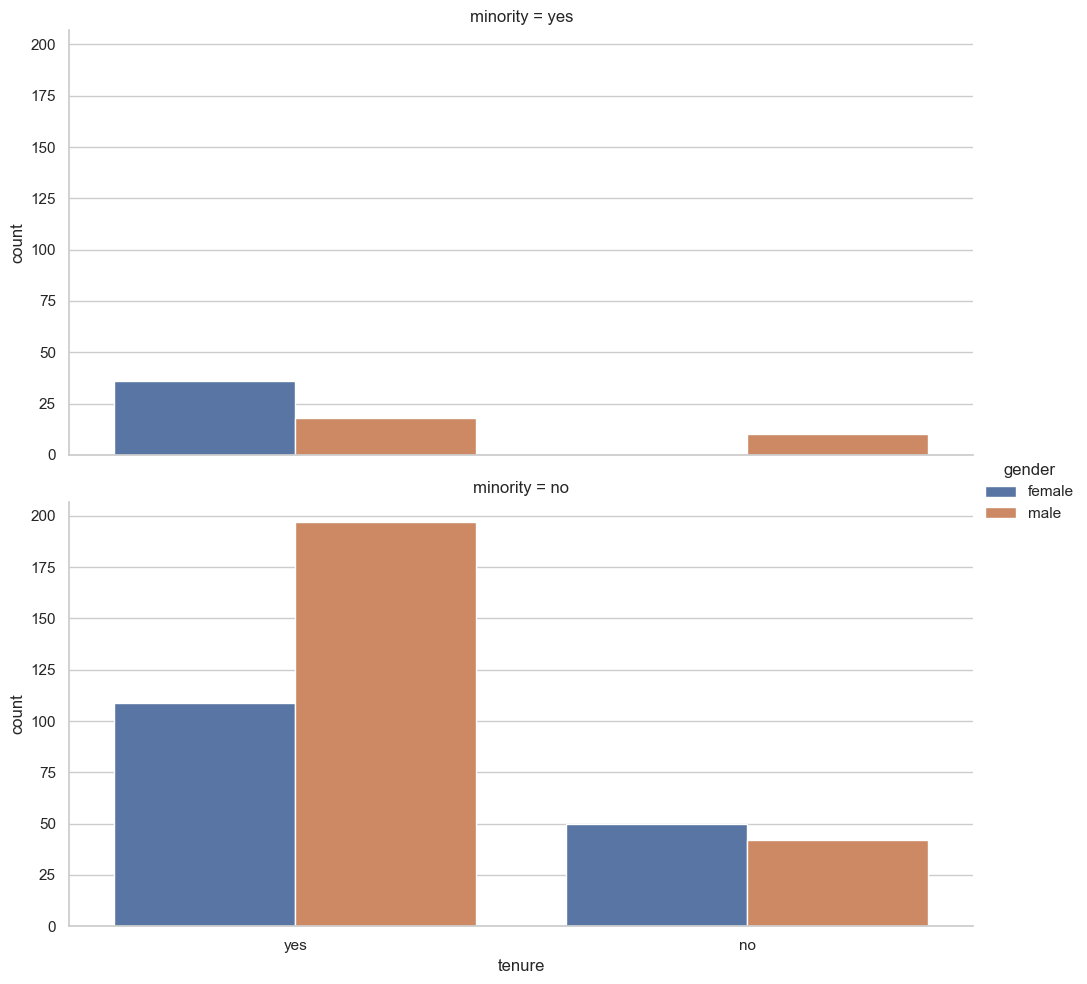

In [88]:
#plotting two differnt plot using same code, to diffreciate the tenure via division 
sns.catplot(x='tenure', kind='count', data=teaching, hue='gender',row='minority', height=5, aspect=2)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


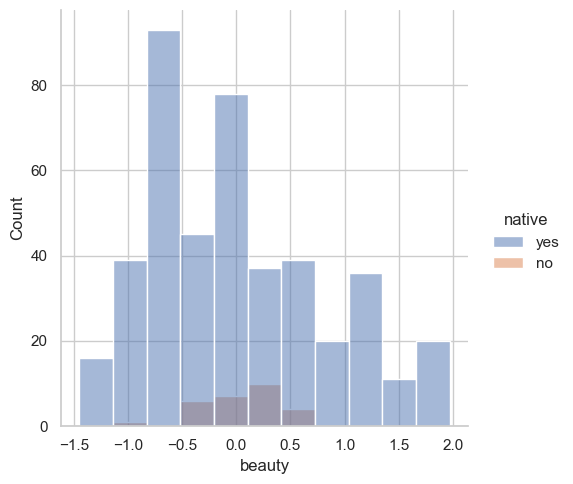

In [93]:
#displot for beauty via native
sns.displot(x= 'beauty',data=teaching, hue='native')

<Axes: xlabel='age'>

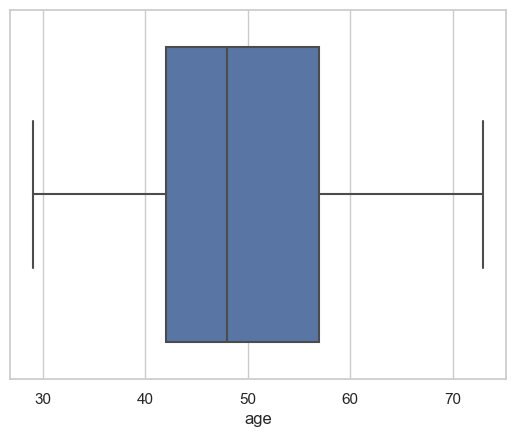

In [94]:
#plotting boxplot for age
sns.boxplot(x='age',data=teaching)

<Axes: xlabel='gender', ylabel='prof'>

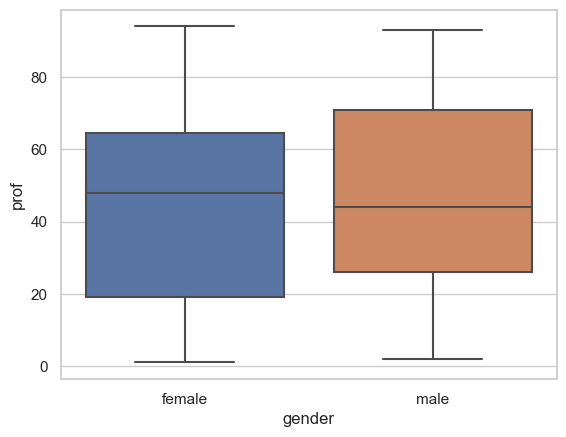

In [95]:
#plotting boxplot to know the relationship btw gender and prof
sns.boxplot(x='gender', y='prof',data=teaching)

Text(0, 0.5, 'Age')

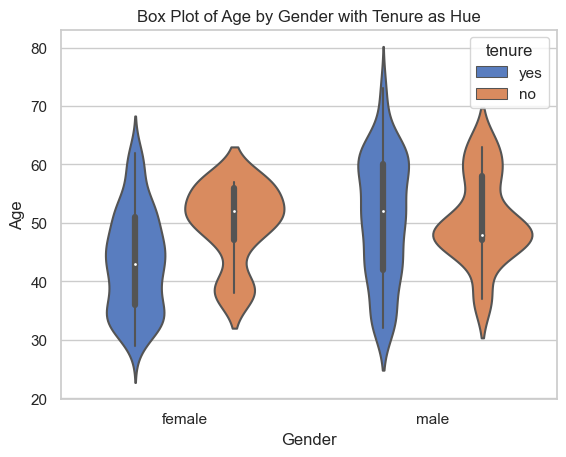

In [98]:
#compare  age, gender and tunure 
sns.violinplot(data=teaching, x='gender', y='age', hue='tenure', kind='box', palette='muted')
plt.title('Box Plot of Age by Gender with Tenure as Hue')
plt.xlabel('Gender')
plt.ylabel('Age')